In [333]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [334]:
# Importando a base
dados = pd.read_excel('perfil_clientes_edits.xlsx')
dados.head(3)

,Atividade,Ramo de atuação,Colaboradores,Faixa etária gestor,Caracteristica do Gestor,Faturamento estimado,Frequencia Suporte,Tipo de Suporte,Categoria Suporte
0,SERVIÇO,AUTOMÓVEIS,De 5 a 10,De 30 a 40 anos,"""Cabeça aberta""",De R$ 100 a R$ 400 mil,Até 3 vezes por semana,Necessidade de emisão de NF,Fiscal
1,COMÉRCIO,INSTRUMENTOS MUSICAIS,De 10 a 20,De 30 a 40 anos,"""Cabeça aberta""",Acima de R$ 400 mil,Até 3 vezes por semana,Configurações / on-boarding,Configurações
2,INDÚSTRIA,MOVELEIRO,De 10 a 20,De 30 a 40 anos,"""Cabeça aberta""",De R$ 100 a R$ 400 mil,Até uma vez por semana,Necessidade de emisão de NF,Fiscal


In [335]:
# estatísticas da base
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Atividade                 74 non-null     object
 1   Ramo de atuação           74 non-null     object
 2   Colaboradores             74 non-null     object
 3   Faixa etária gestor       74 non-null     object
 4   Caracteristica do Gestor  74 non-null     object
 5   Faturamento estimado      74 non-null     object
 6   Frequencia Suporte        74 non-null     object
 7   Tipo de Suporte           74 non-null     object
 8   Categoria Suporte         74 non-null     object
dtypes: object(9)
memory usage: 5.3+ KB


In [340]:
## criando coluna de targets
dados['target_gestor'] = 0
mente_aberta = dados['Caracteristica do Gestor'] == '"Cabeça aberta"'
dados.loc[mente_aberta, 'target_gestor'] = 1

dados['target_suporte'] = 0
baixo_suporte = (dados['Frequencia Suporte'] == 'Menos de uma vez por semana') | (dados['Frequencia Suporte'] == 'Raramente')
#baixo_suporte = dados['Frequencia Suporte'] == 'Raramente'
dados.loc[baixo_suporte, 'target_suporte'] = 1

dados.head(3)


,Atividade,Ramo de atuação,Colaboradores,Faixa etária gestor,Caracteristica do Gestor,Faturamento estimado,Frequencia Suporte,Tipo de Suporte,Categoria Suporte,target_gestor,target_suporte
0,SERVIÇO,AUTOMÓVEIS,De 5 a 10,De 30 a 40 anos,"""Cabeça aberta""",De R$ 100 a R$ 400 mil,Até 3 vezes por semana,Necessidade de emisão de NF,Fiscal,1,0
1,COMÉRCIO,INSTRUMENTOS MUSICAIS,De 10 a 20,De 30 a 40 anos,"""Cabeça aberta""",Acima de R$ 400 mil,Até 3 vezes por semana,Configurações / on-boarding,Configurações,1,0
2,INDÚSTRIA,MOVELEIRO,De 10 a 20,De 30 a 40 anos,"""Cabeça aberta""",De R$ 100 a R$ 400 mil,Até uma vez por semana,Necessidade de emisão de NF,Fiscal,1,0


In [341]:
dados_y = dados['target_suporte']
dados_x = dados.drop(dados[['Frequencia Suporte', 'Tipo de Suporte','Categoria Suporte','target_gestor','target_suporte']], axis=1)

#print(dados_x)
#print(dados_y)


In [342]:
# Convertendo valores de string para valores númericos para conseguirmos usar no modelo de Regressão.
dummies = pd.get_dummies(dados_x)

print(dummies.columns)

#print(dummies)

Index(['Atividade_COMÉRCIO', 'Atividade_INDÚSTRIA', 'Atividade_SERVIÇO',
       'Ramo de atuação_AGROINDÚSTRIA', 'Ramo de atuação_AGROPECUÁRIA',
       'Ramo de atuação_ALIMENTAÇÃO', 'Ramo de atuação_AUTOMÓVEIS',
       'Ramo de atuação_AUTOPEÇAS', 'Ramo de atuação_CALÇADOS',
       'Ramo de atuação_CONSTRUÇÃO', 'Ramo de atuação_CONTABILIDADE',
       'Ramo de atuação_DEDETIZAÇÃO', 'Ramo de atuação_DISTRIBUIDORA DE GÁS',
       'Ramo de atuação_ELÉTRICA', 'Ramo de atuação_INSTRUMENTOS MUSICAIS',
       'Ramo de atuação_JOALHEIRIA', 'Ramo de atuação_LAZER E PISCINAS',
       'Ramo de atuação_MADEREIRA', 'Ramo de atuação_METAL MECÂNICA',
       'Ramo de atuação_MONITORAMENTO', 'Ramo de atuação_MOVELEIRO',
       'Ramo de atuação_MÁQUINAS DE COSTURA', 'Ramo de atuação_PANIFICAÇÃO',
       'Ramo de atuação_PEÇAS', 'Ramo de atuação_PRODUTOS DE LIMPEZA',
       'Ramo de atuação_RETÍFICA DE MOTORES', 'Ramo de atuação_VESTUÁRIO',
       'Colaboradores_Até 5', 'Colaboradores_De 10 a 20',
      

In [343]:
# Carregando os dados em um array numpy
X = np.array(dummies.values)
y = np.array(dados_y.values)

print(X)
print(X.shape)
print(y)
print(y.shape)

[[0 0 1 ... 0 1 0]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 1 0]
 ...
 [0 1 0 ... 0 0 1]
 [1 0 0 ... 1 0 0]
 [1 0 0 ... 1 0 0]]
(74, 45)
[0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 0
 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1]
(74,)


In [352]:
# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)


In [353]:
# Para as variáveis de treino

# normalizando e padronizando os dados
# MinMaxScaler é usado para normalizar as variáveis, e StandardScaler é usado para padronizar
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# dados x (features) normalizados
# X = np.array(X)

# normalizando
scaler = MinMaxScaler()
scaler.fit(X_train)
normalized_data = scaler.transform(X_train)
print(normalized_data)

# Padronizando
scaler = StandardScaler()
scaler.fit(X_train)
standardized_data = scaler.transform(X_train)
print(standardized_data)

print(standardized_data.shape)

X_train = standardized_data

[[0. 0. 1. ... 0. 0. 1.]
 [1. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]]
[[-1.10335457 -0.52440442  1.80277564 ... -0.6761234  -0.4938648
   1.24498996]
 [ 0.90632697 -0.52440442 -0.5547002  ...  1.47901995 -0.4938648
  -0.80321933]
 [ 0.90632697 -0.52440442 -0.5547002  ...  1.47901995 -0.4938648
  -0.80321933]
 ...
 [ 0.90632697 -0.52440442 -0.5547002  ... -0.6761234  -0.4938648
   1.24498996]
 [-1.10335457 -0.52440442  1.80277564 ... -0.6761234  -0.4938648
   1.24498996]
 [ 0.90632697 -0.52440442 -0.5547002  ... -0.6761234  -0.4938648
  -0.80321933]]
(51, 45)


In [354]:
# Para as variáveis de teste

# normalizando e padronizando os dados
# MinMaxScaler é usado para normalizar as variáveis, e StandardScaler é usado para padronizar
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# dados x (features) normalizados
# X = np.array(X)

# normalizando
scaler = MinMaxScaler()
scaler.fit(X_test)
normalized_data = scaler.transform(X_test)
print(normalized_data)

# Padronizando
scaler = StandardScaler()
scaler.fit(X_test)
standardized_data = scaler.transform(X_test)
print(standardized_data)

print(standardized_data.shape)

X_test = standardized_data

[[1. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 ...
 [1. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 1. 0. 0.]]
[[ 0.59408853 -0.45883147 -0.3086067  ... -0.59408853 -0.59408853
   1.24721913]
 [-1.68325082 -0.45883147  3.24037035 ... -0.59408853  1.68325082
  -0.80178373]
 [ 0.59408853 -0.45883147 -0.3086067  ... -0.59408853 -0.59408853
   1.24721913]
 ...
 [ 0.59408853 -0.45883147 -0.3086067  ... -0.59408853 -0.59408853
   1.24721913]
 [-1.68325082  2.17944947 -0.3086067  ... -0.59408853 -0.59408853
   1.24721913]
 [ 0.59408853 -0.45883147 -0.3086067  ...  1.68325082 -0.59408853
  -0.80178373]]
(23, 45)


In [355]:
# Criando o modelo
model = LogisticRegression(random_state=0,max_iter=1000)

# Treinando o modelo
model.fit(X_train, y_train)

clf2 = LogisticRegression(random_state=45,max_iter=1000).fit(X_train, y_train)

In [356]:
# Fazendo a previsão das classes
y_pred2 = clf2.predict(X_test)

In [357]:
# Avaliando o erro

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred2)

array([[7, 3],
       [5, 8]], dtype=int64)

In [358]:
# Avaliando o modelo 
# score = model.score(X_test, y_test)

from sklearn import metrics

score = metrics.accuracy_score(y_test, y_pred2)

print('Acurácia:', score)

# Percentagem de acerto

Acurácia: 0.6521739130434783


In [359]:
# Usando o modelo para previsão
predictions = model.predict(X_test)
print(predictions)

[0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0]


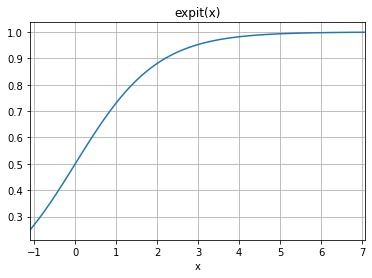

In [360]:
# Visualizando o gráfico

import matplotlib.pyplot as plt
from scipy.special import expit

x = np.linspace(X_train.min(), X_train.max(), 100)
y = expit(x)
plt.plot(x, y)
plt.grid()
plt.xlim(X_train.min(), X_train.max())
plt.xlabel('x')
plt.title('expit(x)')
plt.show()

In [361]:
# Comparando a previsão com o valor real
print('O valor de y teste é:')
print(y_test)

print('O valor do y_pred é:')
print(predictions)

O valor de y teste é:
[0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0]
O valor do y_pred é:
[0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0]


In [362]:
# Fazendo a previsão das probabilidades
proba = clf2.predict_proba(X_test)
print(proba)

# Probabilidade de acionar o suporte até 1vez na semana é de:
probabilidade_baixo_suporte = proba[:,1]

list(probabilidade_baixo_suporte)

[[0.59223035 0.40776965]
 [0.2301582  0.7698418 ]
 [0.07629264 0.92370736]
 [0.51103819 0.48896181]
 [0.76251408 0.23748592]
 [0.97398708 0.02601292]
 [0.02097275 0.97902725]
 [0.51103819 0.48896181]
 [0.361592   0.638408  ]
 [0.87151527 0.12848473]
 [0.01553828 0.98446172]
 [0.91894554 0.08105446]
 [0.07629264 0.92370736]
 [0.07629264 0.92370736]
 [0.0842806  0.9157194 ]
 [0.07629264 0.92370736]
 [0.07629264 0.92370736]
 [0.5664636  0.4335364 ]
 [0.99706477 0.00293523]
 [0.98352846 0.01647154]
 [0.07629264 0.92370736]
 [0.97843284 0.02156716]
 [0.51103819 0.48896181]]


[0.4077696524503161,
 0.7698418012274668,
 0.9237073602477,
 0.4889618100248178,
 0.23748591965772278,
 0.026012921636521382,
 0.9790272474459333,
 0.4889618100248178,
 0.6384080045585301,
 0.12848473413568975,
 0.9844617153706811,
 0.08105446368691667,
 0.9237073602477,
 0.9237073602477,
 0.9157193964453859,
 0.9237073602477,
 0.9237073602477,
 0.43353639659208865,
 0.002935234833902952,
 0.016471541753645718,
 0.9237073602477,
 0.02156716236748745,
 0.4889618100248179]

### Prevendo novos valores

In [386]:
dados_x_input = dados.drop(dados[['Frequencia Suporte', 'Tipo de Suporte','Categoria Suporte','target_gestor','target_suporte']], axis=1)
dados_x_input['Input'] = 0

dados_y = dados['target_suporte']

dados_x_input

,Atividade,Ramo de atuação,Colaboradores,Faixa etária gestor,Caracteristica do Gestor,Faturamento estimado,Input
0,SERVIÇO,AUTOMÓVEIS,De 5 a 10,De 30 a 40 anos,"""Cabeça aberta""",De R$ 100 a R$ 400 mil,0
1,COMÉRCIO,INSTRUMENTOS MUSICAIS,De 10 a 20,De 30 a 40 anos,"""Cabeça aberta""",Acima de R$ 400 mil,0
2,INDÚSTRIA,MOVELEIRO,De 10 a 20,De 30 a 40 anos,"""Cabeça aberta""",De R$ 100 a R$ 400 mil,0
3,SERVIÇO,ELÉTRICA,De 5 a 10,De 40 a 50 anos,"""Cabeça aberta""",De R$ 50 a R$ 100 mil,0
4,INDÚSTRIA,CONSTRUÇÃO,De 20 a 30,De 40 a 50 anos,Pensamento rígido,De R$ 100 a R$ 400 mil,0
...,...,...,...,...,...,...,...
69,COMÉRCIO,VESTUÁRIO,Até 5,De 30 a 40 anos,Desatualizado,Até R$ 50 mil,0
70,INDÚSTRIA,CALÇADOS,De 10 a 20,De 30 a 40 anos,Pensamento rígido,De R$ 50 a R$ 100 mil,0
71,INDÚSTRIA,CALÇADOS,De 10 a 20,De 30 a 40 anos,Pensamento rígido,De R$ 50 a R$ 100 mil,0
72,COMÉRCIO,ALIMENTAÇÃO,Até 5,De 30 a 40 anos,Desatualizado,Até R$ 50 mil,0


In [455]:
data = {}


for item in dados_x_input.columns[:-1]:
    
    print(f'Para a coluna de {item}')

    options = set(dados_x_input[item])

    lista_len = len(options)

    c = 1
    opt = []


    for op in options:
        list_add_opt = []
        list_add_opt = [[c], [op]]
        opt.append(list_add_opt)
        c += 1

    data[item] = opt

print(data)


Para a coluna de Atividade
Para a coluna de Ramo de atuação
Para a coluna de Colaboradores
Para a coluna de Faixa etária gestor
Para a coluna de Caracteristica do Gestor
Para a coluna de Faturamento estimado
{'Atividade': [[[1], ['SERVIÇO']], [[2], ['COMÉRCIO']], [[3], ['INDÚSTRIA']]], 'Ramo de atuação': [[[1], ['CONTABILIDADE']], [[2], ['METAL MECÂNICA']], [[3], ['MADEREIRA']], [[4], ['CALÇADOS']], [[5], ['RETÍFICA DE MOTORES']], [[6], ['DISTRIBUIDORA DE GÁS']], [[7], ['ELÉTRICA']], [[8], ['PRODUTOS DE LIMPEZA']], [[9], ['PEÇAS']], [[10], ['PANIFICAÇÃO']], [[11], ['ALIMENTAÇÃO']], [[12], ['DEDETIZAÇÃO']], [[13], ['AUTOMÓVEIS']], [[14], ['CONSTRUÇÃO']], [[15], ['AGROPECUÁRIA']], [[16], ['JOALHEIRIA']], [[17], ['MONITORAMENTO']], [[18], ['MOVELEIRO']], [[19], ['LAZER E PISCINAS']], [[20], ['VESTUÁRIO']], [[21], ['MÁQUINAS DE COSTURA']], [[22], ['AGROINDÚSTRIA']], [[23], ['AUTOPEÇAS']], [[24], ['INSTRUMENTOS MUSICAIS']]], 'Colaboradores': [[[1], ['De 20 a 30']], [[2], ['De 10 a 20']], [[

In [473]:
data_input = {}

for k,v in data.items():
   # for i in k:
    print(f'Escolha o número da opção de {k}')

    opt_list = len(v)
    for i in range(0, opt_list):
        print(f'{v[i][0]} - {v[i][1]}')
        
    number = 0
    while number not in range(1, opt_list + 1):
        number = int(input(f'Digite o número da opção. Escolha valores entre {range(1, opt_list+1)}'))
    print(f'Você escolheu a opção {v[number][1]}')
    
    data_input[k] = v[number][1]

data_input['Input'] = [1]

print(data_input)

Escolha o número da opção de Atividade
[1] - ['SERVIÇO']
[2] - ['COMÉRCIO']
[3] - ['INDÚSTRIA']


Você escolheu a opção ['COMÉRCIO']
Escolha o número da opção de Ramo de atuação
[1] - ['CONTABILIDADE']
[2] - ['METAL MECÂNICA']
[3] - ['MADEREIRA']
[4] - ['CALÇADOS']
[5] - ['RETÍFICA DE MOTORES']
[6] - ['DISTRIBUIDORA DE GÁS']
[7] - ['ELÉTRICA']
[8] - ['PRODUTOS DE LIMPEZA']
[9] - ['PEÇAS']
[10] - ['PANIFICAÇÃO']
[11] - ['ALIMENTAÇÃO']
[12] - ['DEDETIZAÇÃO']
[13] - ['AUTOMÓVEIS']
[14] - ['CONSTRUÇÃO']
[15] - ['AGROPECUÁRIA']
[16] - ['JOALHEIRIA']
[17] - ['MONITORAMENTO']
[18] - ['MOVELEIRO']
[19] - ['LAZER E PISCINAS']
[20] - ['VESTUÁRIO']
[21] - ['MÁQUINAS DE COSTURA']
[22] - ['AGROINDÚSTRIA']
[23] - ['AUTOPEÇAS']
[24] - ['INSTRUMENTOS MUSICAIS']
Você escolheu a opção ['METAL MECÂNICA']
Escolha o número da opção de Colaboradores
[1] - ['De 20 a 30']
[2] - ['De 10 a 20']
[3] - ['Até 5']
[4] - ['De 30 a 50']
[5] - ['De 5 a 10']
Você escolheu a opção ['De 10 a 20']
Escolha o número da opção de Faixa etária gestor
[1] - ['50+']
[2] - ['De 30 a 40 anos']
[3] - ['De 40 a 50 anos']
[4] - [

In [475]:
dados_input = pd.DataFrame(data_input)

dados_input = pd.concat([dados_x_input, dados_input])

dados_input.tail(3)

,Atividade,Ramo de atuação,Colaboradores,Faixa etária gestor,Caracteristica do Gestor,Faturamento estimado,Input
72,COMÉRCIO,ALIMENTAÇÃO,Até 5,De 30 a 40 anos,Desatualizado,Até R$ 50 mil,0
73,COMÉRCIO,CONSTRUÇÃO,Até 5,50+,Pensamento rígido,Até R$ 50 mil,0
0,COMÉRCIO,METAL MECÂNICA,De 10 a 20,De 30 a 40 anos,Totalmente Antiquado,De R$ 100 a R$ 400 mil,1


In [412]:
## Realizando a previsão:
## Adição manual

# data = {
#     'Atividade': ['COMÉRCIO'],
#     'Ramo de atuação': ['PANIFICAÇÃO'],
#     'Colaboradores': ['De 10 a 20'],
#     'Faixa etária gestor': ['50+'],
#     'Caracteristica do Gestor': ['"Cabeça aberta"'],
#     'Faturamento estimado': ['Até R$ 50 mil'],
#     'Input': [1]
# }

# dados_input = pd.DataFrame(data)

# dados_input = pd.concat([dados_x_input, dados_input])

# dados_input.tail(3)


,Atividade,Ramo de atuação,Colaboradores,Faixa etária gestor,Caracteristica do Gestor,Faturamento estimado,Input
72,COMÉRCIO,ALIMENTAÇÃO,Até 5,De 30 a 40 anos,Desatualizado,Até R$ 50 mil,0
73,COMÉRCIO,CONSTRUÇÃO,Até 5,50+,Pensamento rígido,Até R$ 50 mil,0
0,COMÉRCIO,PANIFICAÇÃO,De 10 a 20,50+,"""Cabeça aberta""",Até R$ 50 mil,1


In [413]:
# Convertendo valores de string para valores númericos para conseguirmos usar no modelo de Regressão.
dummies = pd.get_dummies(dados_input)

#print(dummies.columns)

#print(dummies)


In [414]:
dummies_input = dummies[dummies['Input'] == 1]
dummies_input = dummies_input.drop(dummies_input[['Input']], axis=1)
dummies_input


,Atividade_COMÉRCIO,Atividade_INDÚSTRIA,Atividade_SERVIÇO,Ramo de atuação_AGROINDÚSTRIA,Ramo de atuação_AGROPECUÁRIA,Ramo de atuação_ALIMENTAÇÃO,Ramo de atuação_AUTOMÓVEIS,Ramo de atuação_AUTOPEÇAS,Ramo de atuação_CALÇADOS,Ramo de atuação_CONSTRUÇÃO,...,Faixa etária gestor_De 40 a 50 anos,"Caracteristica do Gestor_""Cabeça aberta""",Caracteristica do Gestor_Desatualizado,Caracteristica do Gestor_Pensamento Rígido,Caracteristica do Gestor_Pensamento rígido,Caracteristica do Gestor_Totalmente Antiquado,Faturamento estimado_Acima de R$ 400 mil,Faturamento estimado_Até R$ 50 mil,Faturamento estimado_De R$ 100 a R$ 400 mil,Faturamento estimado_De R$ 50 a R$ 100 mil
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [415]:
# Carregando os dados em um array numpy
X = np.array(dummies_input.values)

In [416]:
# Usando o modelo para previsão
print('Prevendo classificação para o dado de entrada... \n 0 - Frequência de suporte + 1 Vez por Semana \n 1 - Frequência de suporte menor do que 1 vez por semana')

print('')

# Fazendo a previsão das probabilidades
proba = clf2.predict_proba(X)


print(f'Classificação 0 --> {(proba[0][0] * 100):.2f}% de probabilidade')
print(f'Classificação 1 --> {(proba[0][1] * 100):.2f}% de probabilidade')

print()


predictions = model.predict(X)[-1]
print('A classificação predita foi', predictions)


# Performance do modelo:
print('\nAcurácia do modelo:', round((score * 100),2), '%')


# Probabilidade de acionar o suporte até 1 vez na semana é de:
#probabilidade_baixo_suporte = proba[:,1]

#list(probabilidade_baixo_suporte)

Prevendo classificação para o dado de entrada... 
 0 - Frequência de suporte + 1 Vez por Semana 
 1 - Frequência de suporte menor do que 1 vez por semana

Classificação 0 --> 72.50% de probabilidade
Classificação 1 --> 27.50% de probabilidade

A classificação predita foi 0

Acurácia do modelo: 65.22 %
